# **NVIDIA** Stock Price Prediction from 2019 to 2024

In [ ]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
plt.style.use('fivethirtyeight')

In [ ]:
nvda = yf.Ticker("NVDA")
nvidia = nvda.history(start='2019-01-01')

In [ ]:
nvidia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,3.240214,3.434666,3.225580,3.378612,508752000,0.0,0.0
2019-01-03 00:00:00-05:00,3.318341,3.352321,3.167045,3.174486,705552000,0.0,0.0
2019-01-04 00:00:00-05:00,3.247654,3.416064,3.216899,3.377868,585620000,0.0,0.0
2019-01-07 00:00:00-05:00,3.435162,3.593650,3.383820,3.556695,709160000,0.0,0.0
2019-01-08 00:00:00-05:00,3.638295,3.640527,3.395477,3.468149,786016000,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-25 00:00:00-04:00,113.040001,116.629997,106.300003,112.279999,460067000,0.0,0.0
2024-07-26 00:00:00-04:00,116.190002,116.199997,111.580002,113.059998,293399100,0.0,0.0
2024-07-29 00:00:00-04:00,113.690002,116.279999,111.300003,111.589996,248152100,0.0,0.0


In [ ]:
nvidia = nvidia.drop(columns=['Volume', 'Dividends', 'Stock Splits'])

In [ ]:
nvidia['Date'] = nvidia.index.strftime('%Y-%m-%d')
nvidia['Year'] = pd.DatetimeIndex(nvidia['Date']).year
nvidia = nvidia.reindex(columns=['Date', 'Year', 'Open', 'High', 'Low', 'Close'])
nvidia = nvidia.reset_index(drop=True)
nvidia

,Date,Year,Open,High,Low,Close
0,2019-01-02,2019,3.240214,3.434666,3.225580,3.378612
1,2019-01-03,2019,3.318341,3.352321,3.167045,3.174486
2,2019-01-04,2019,3.247654,3.416064,3.216899,3.377868
3,2019-01-07,2019,3.435162,3.593650,3.383820,3.556695
4,2019-01-08,2019,3.638295,3.640527,3.395477,3.468149
...,...,...,...,...,...,...
1399,2024-07-25,2024,113.040001,116.629997,106.300003,112.279999
1400,2024-07-26,2024,116.190002,116.199997,111.580002,113.059998
1401,2024-07-29,2024,113.690002,116.279999,111.300003,111.589996
1402,2024-07-30,2024,111.519997,111.989998,102.540001,103.730003


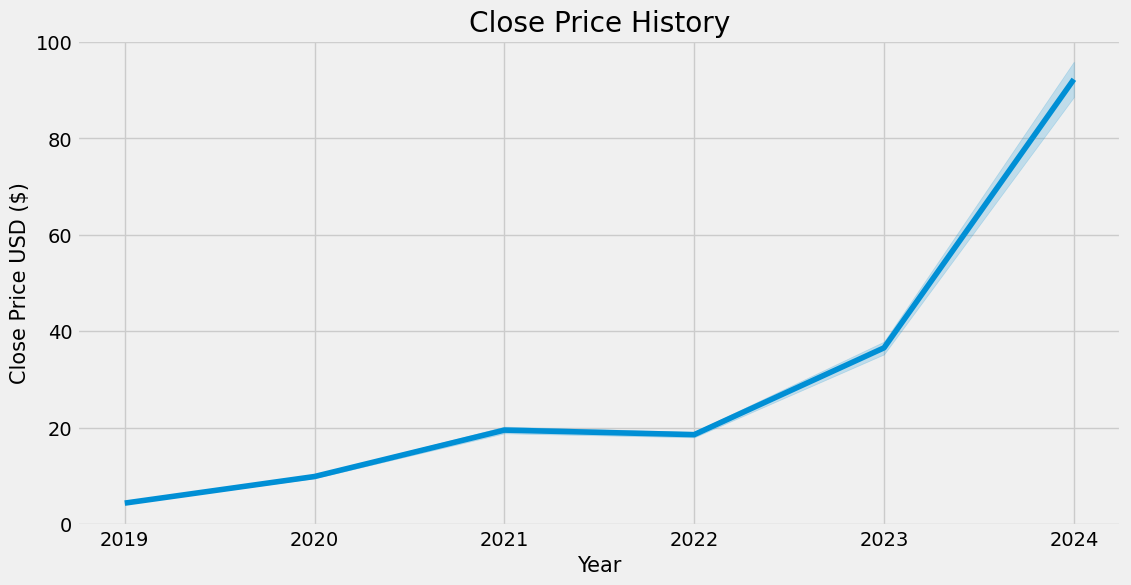

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(12,6))
plt.title('Close Price History')
sns.lineplot(nvidia, x='Year', y='Close')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Close Price USD ($)',fontsize=15)
plt.show()

In [ ]:
# Create a new dataframe with only the Close column
close = nvidia.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = close.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1124

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00154167],
       [0.        ],
       [0.00153605],
       ...,
       [0.81881415],
       [0.75945112],
       [0.85982453]])

In [ ]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00154167, 0.        , 0.00153605, 0.00288665, 0.00221791,
       0.00273304, 0.00322945, 0.00390382, 0.0042054 , 0.00409863,
       0.00390569, 0.00444518, 0.00542113, 0.00389257, 0.00398999,
       0.0055916 , 0.00602431, 0.00187698, 0.00067624, 0.00176083,
       0.00295221, 0.00313579, 0.00396937, 0.00411361, 0.00468495,
       0.00363969, 0.00378018, 0.00345798, 0.00434215, 0.00466247,
       0.00497155, 0.00549793, 0.00536681, 0.00572459, 0.00520383,
       0.00584448, 0.00575082, 0.00545297, 0.0051364 , 0.00495076,
       0.00536142, 0.0054233 , 0.00537455, 0.00453635, 0.00401318,
       0.00427195, 0.00624087, 0.00649964, 0.00764349, 0.0070697 ,
       0.00786664, 0.00770536, 0.00897298, 0.00872734, 0.01051624,
       0.00930863, 0.00861108, 0.00919049, 0.00912112, 0.00926175])]
[0.009694916449149386]

[array([0.00154167, 0.        , 0.00153605, 0.00288665, 0.00221791,
       0.00273304, 0.00322945, 0.00390382, 0.0042054 , 0.00409863,
       0.00390569, 0.00444518, 0.0

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1064, 60, 1)

In [ ]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5.8892e-05
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 6.1292e-05
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5.9309e-05
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 6.5360e-05
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 5.1307e-05
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 4.9799e-05
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 4.8439e-05
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 5.7781e-05
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 4.8625e-05
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 5.7137e-05
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 4.5168e-05
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 5.0526e-05
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5.0857e-05
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 4.6708e-05

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1064 to 1124
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.0869403566632952

<ipython-input-74-601601ddcdde>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


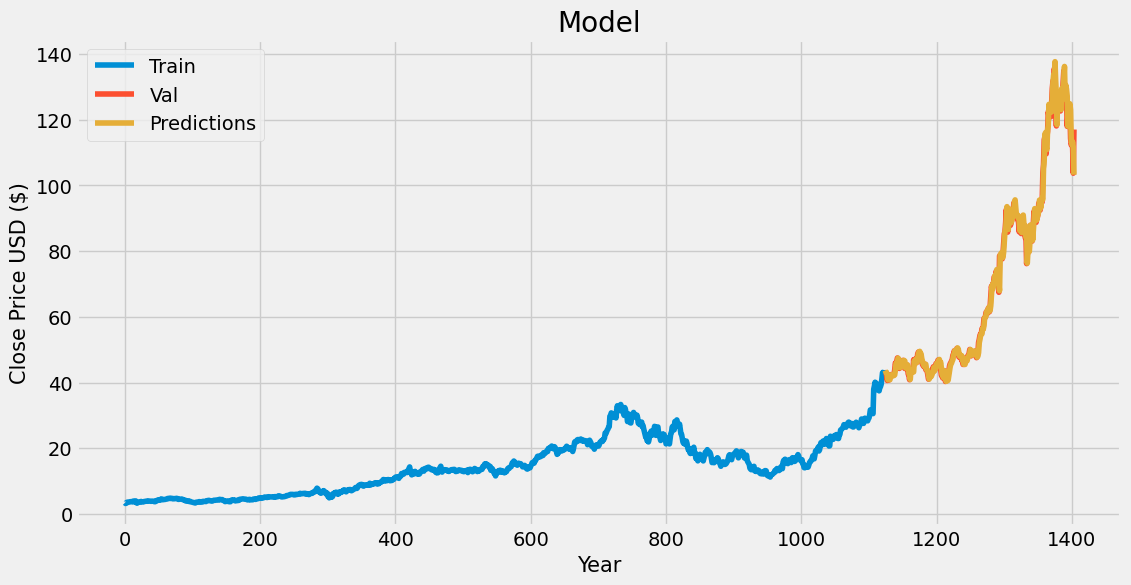

In [ ]:
# Plot the data
train = nvidia[:training_data_len]
valid = nvidia[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12, 6))
plt.title('Model')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid[['Close', 'Predictions']]

,Close,Predictions
1124,43.032116,43.669708
1125,43.012127,43.081070
1126,42.196365,43.059135
1127,40.619839,42.317234
1128,41.863464,40.831425
...,...,...
1399,112.279999,113.897415
1400,113.059998,112.434723
1401,111.589996,113.306679
1402,103.730003,111.685013


In [ ]:
# Get the quote
nvda1 = yf.Ticker('NVDA')
nvidia1 = nvda1.history(start='2019-01-01')
#Create a new dataframe
nvidia_df = nvidia1.filter(['Close'])
# Get the last 60 day closing price and convert the dataframe to an array
last_60_days = nvidia_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[118.28453]]


In [ ]:
# Get the quote
nvda2 = yf.Ticker('NVDA')
nvidia2 = nvda2.history(start='2024-07-30')
print(nvidia2['Close'])

Date
2024-07-30 00:00:00-04:00    103.730003
2024-07-31 00:00:00-04:00    117.019997
Name: Close, dtype: float64


In [ ]:
# Evaluate the model
print('\033[1mMean Absolute Error:\033[0m', mean_absolute_error(y_test, predictions))
print('\033[1mMean Squared Error:\033[0m', mean_squared_error(y_test, predictions))
print('\033[1mRoot Mean Squared Error:\033[0m', np.sqrt(mean_squared_error(y_test, predictions)))
print('\033[1mR2 Score:\033[0m', r2_score(y_test, predictions))

Mean Absolute Error: 1.6726676395961217
Mean Squared Error: 6.652572829073636
Root Mean Squared Error: 2.579258193565281
R2 Score: 0.9920905499787998


There is only a **~1 USD ($)** difference between the predicted price and the original price.
Accuracy and R2 score is ~99%.
Therefore it is a good model.